In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

import nltk
nltk.download('stopwords')
nltk.download("punkt")



data = pd.read_csv('Womens Clothing Reviews Data.csv')


[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>
[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>


### 1. Performing Exploratory Analysis on the Data to Understand the Patterns:
 Exploratory analysis involves examining the dataset to get an initial understanding of its structure, variables, and potential patterns. This step is crucial for identifying trends, outliers, and relationships within the data. The goal is to gain insights into customer behaviors and preferences based on their demographics and reviews. Exploratory analysis may include data visualizations such as bar plots, histograms, scatter plots, and summary statistics.

##### a. Characteristic of data

In [53]:
# the 'head()' method is used to retrieve the top rows of the Dataframe. By defult, it returnd the five rows.
data.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1


In [54]:
#this line show about dataset, including datatypes, non-null counts, and memory usage.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      23486 non-null  int64 
 1   Category        23472 non-null  object
 2   Subcategory1    23472 non-null  object
 3   SubCategory2    23472 non-null  object
 4   Location        23486 non-null  object
 5   Channel         23486 non-null  object
 6   Customer Age    23486 non-null  int64 
 7   Review Title    19676 non-null  object
 8   Review Text     22641 non-null  object
 9   Rating          23486 non-null  int64 
 10  Recommend Flag  23486 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.0+ MB


In [55]:
#summary statistics for numerical columns 
data.describe()

,Product ID,Customer Age,Rating,Recommend Flag
count,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362
std,203.298980,12.279544,1.110031,0.382216
min,0.000000,18.000000,1.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000
50%,936.000000,41.000000,5.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000
max,1205.000000,99.000000,5.000000,1.000000


In [56]:
#check null data
data.isnull().sum()

Product ID           0
Category            14
Subcategory1        14
SubCategory2        14
Location             0
Channel              0
Customer Age         0
Review Title      3810
Review Text        845
Rating               0
Recommend Flag       0
dtype: int64

#### b. Data Cleaning 

In [57]:
#drop null data
data.dropna(inplace=True)

In [58]:
#check again if there's any other null data
data.isnull().sum()

Product ID        0
Category          0
Subcategory1      0
SubCategory2      0
Location          0
Channel           0
Customer Age      0
Review Title      0
Review Text       0
Rating            0
Recommend Flag    0
dtype: int64

In [59]:
#find data duplicate and drop duplicate data
data.drop_duplicates() 

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1
5,1080,General,Dresses,Dresses,Gurgaon,Web,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0
6,858,General Petite,Tops,Knits,Gurgaon,Mobile,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1
...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,General Petite,Dresses,Dresses,Gurgaon,Mobile,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1
23482,862,General Petite,Tops,Knits,Gurgaon,Web,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1
23483,1104,General Petite,Dresses,Dresses,Gurgaon,Web,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0
23484,1084,General,Dresses,Dresses,Gurgaon,Web,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1


In [60]:
# Move cleaned data to other file
data.to_csv('cleaned data.csv', index=False)

In [61]:
## Data Virtualization

In [62]:
# read the cleaned data 
data = pd.read_csv('cleaned data.csv')


#### c. Exploratory Data Analysis (EDA)


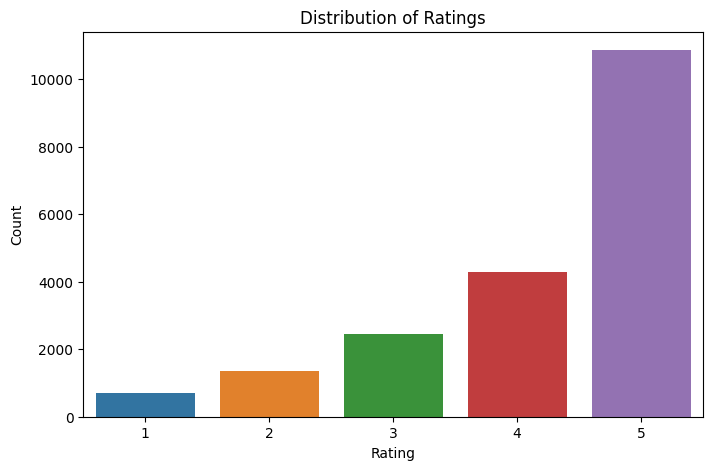

In [63]:
# Plotting the distribution of ratings
plt.figure(figsize=(8, 5))
sns.countplot(x='Rating', data=data)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

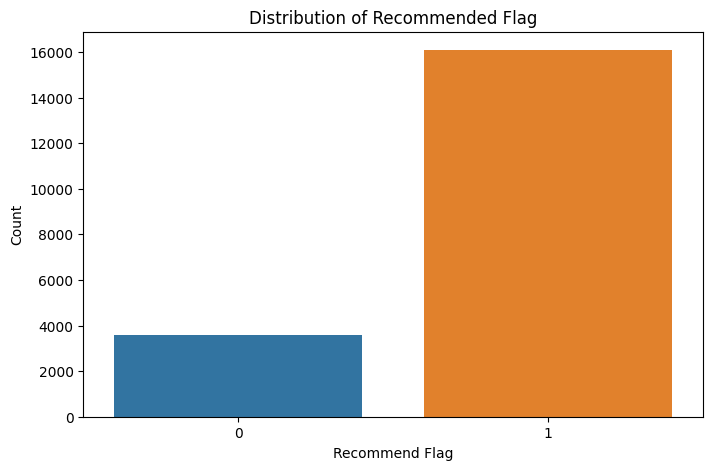

In [64]:
# Plotting the distribution of recommended and non-recommended products
plt.figure(figsize=(8, 5))
sns.countplot(x='Recommend Flag', data=data)
plt.title('Distribution of Recommended Flag')
plt.xlabel('Recommend Flag')
plt.ylabel('Count')
plt.show()

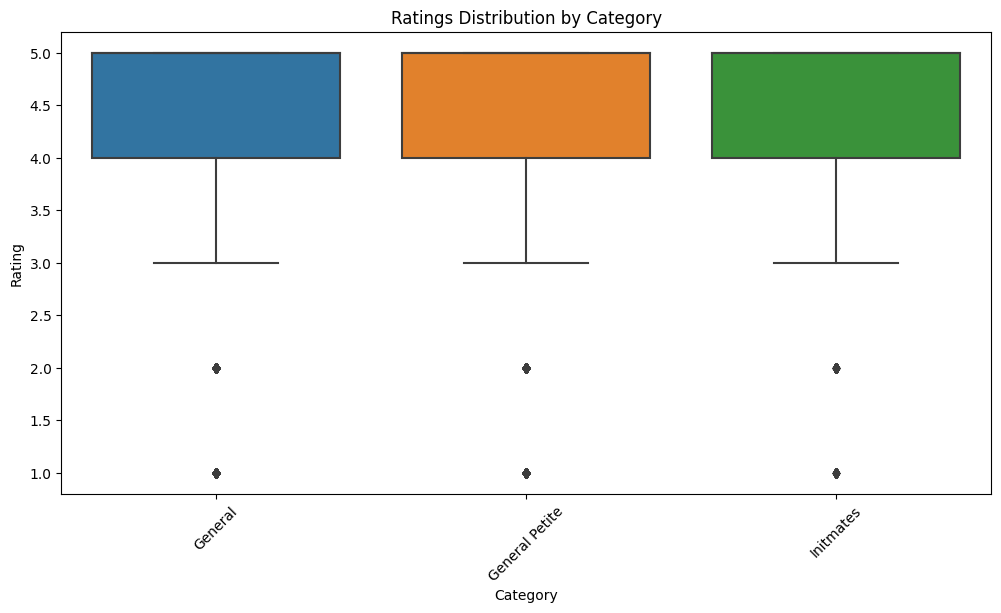

In [65]:
# Visualizing the distribution of ratings by category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Rating', data=data)
plt.title('Ratings Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

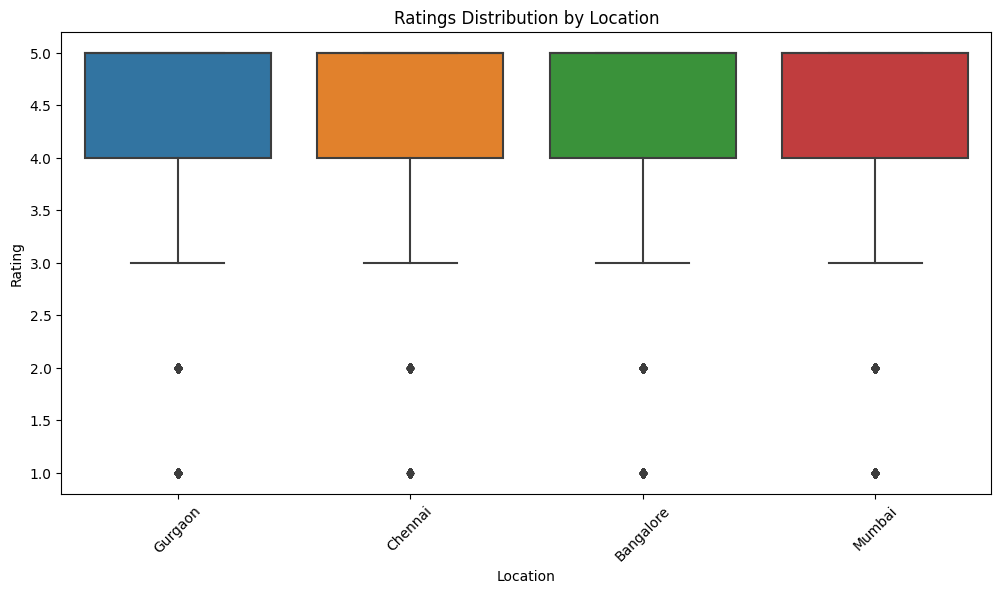

In [66]:
# Visualizing the distribution of ratings by location
plt.figure(figsize=(12, 6))
sns.boxplot(x='Location', y='Rating', data=data)
plt.title('Ratings Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

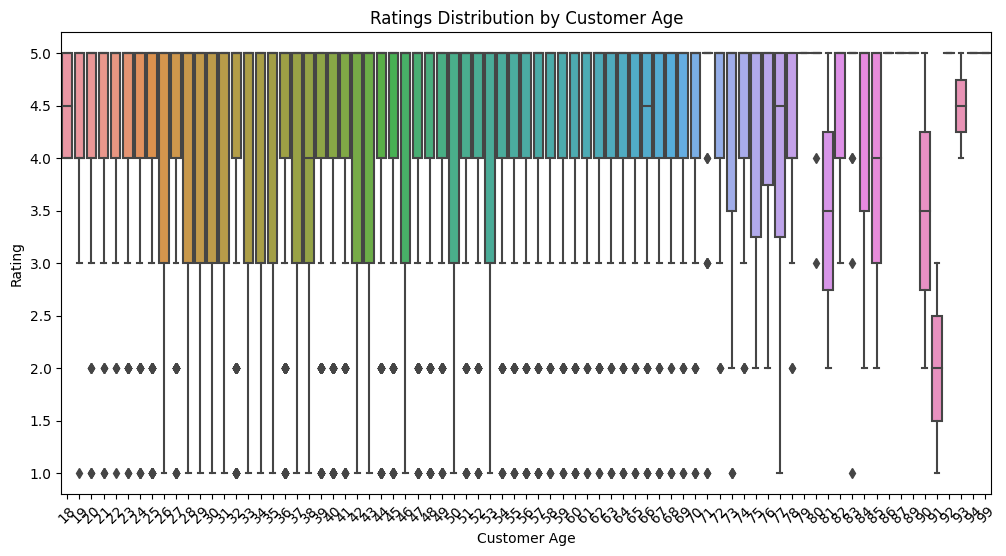

In [67]:
# Visualizing the distribution of ratings by age group
plt.figure(figsize=(12, 6))
sns.boxplot(x='Customer Age', y='Rating', data=data)
plt.title('Ratings Distribution by Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()



### 2. Perform Text Mining Tasks to Understand the Most Frequent Words for Positive and Negative Sentiment. Create Word Clouds for the Positive & Negative Reviews Separately:

Text mining involves analyzing and extracting information from text data. In this case, the objective is to analyze customer reviews submitted on the website. The first step is to process and clean the text data by removing stopwords, special characters, and converting the text to lowercase. Next, sentiment analysis can be performed to classify reviews as positive or negative. Word frequency analysis will help identify the most common words used in positive and negative reviews. Word clouds are visual representations of word frequencies, and separate word clouds can be created for positive and negative sentiments.

In [68]:


data["Review Text"] = data["Review Title"] + " " + data["Review Text"]

# Function to clean and preprocess text
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # # Remove punctuation and special characters
    # text = text.translate(str.maketrans("", "", string.punctuation))
    
    # # Tokenize the text
    # tokens = word_tokenize(text)
    
    # # Remove stopwords
    # stop_words = set(stopwords.words("english"))
    # tokens = [token for token in tokens if token not in stop_words]
    
    # # Join tokens back into a cleaned text
    cleaned_text =text
    
    return cleaned_text

# Apply text cleaning to the Review Text column
data["Cleaned Text"] = data["Review Text"].apply(clean_text)

